In [38]:
import numpy as np
import pandas as pd

from keras.layers import Dense
from keras.models import Sequential

from sklearn.metrics import confusion_matrix

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from matplotlib import pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score

def calculate_model_score(model_class, y_test, y_pred):
    print("Model Class:", model_class)
    # Calculate mean squared error
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error:", mse)

    # Calculate R-squared score
    r2 = r2_score(y_test, y_pred)
    print("R-squared Score:", r2)


url = 'https://drive.google.com/file/d/1DsIOeH7z4WeOipjsQZuxJ3TPt-KAN-pH/view'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

print(url)

dataset = pd.read_csv(url)

dataset

X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

lbl_encoder_1 = LabelEncoder()
X[:,1] = lbl_encoder_1.fit_transform(X[:,1])

lbl_encoder_2 = LabelEncoder()
X[:,2] = lbl_encoder_2.fit_transform(X[:,2])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
len(X_train), len(X_test)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

pd.DataFrame(X_train)


https://drive.google.com/uc?id=1DsIOeH7z4WeOipjsQZuxJ3TPt-KAN-pH


,0,1,2,3,4,5,6,7,8,9
0,0.169582,1.519198,-1.091687,-0.464608,0.006661,-1.215717,0.809503,0.642595,-1.032270,1.106432
1,-2.304559,0.313126,0.916013,0.301026,-1.377440,-0.006312,-0.921591,0.642595,0.968738,-0.748664
2,-1.191196,-0.892945,-1.091687,-0.943129,-1.031415,0.579935,-0.921591,0.642595,-1.032270,1.485335
3,0.035566,1.519198,0.916013,0.109617,0.006661,0.473128,-0.921591,0.642595,-1.032270,1.276528
4,2.056114,1.519198,-1.091687,1.736588,1.044737,0.810193,0.809503,0.642595,0.968738,0.558378
...,...,...,...,...,...,...,...,...,...,...
7995,-0.582970,0.313126,-1.091687,-0.656016,-0.339364,0.703104,0.809503,0.642595,0.968738,1.091330
7996,1.478815,1.519198,-1.091687,-1.613058,-0.339364,0.613060,-0.921591,0.642595,0.968738,0.131760
7997,0.901515,-0.892945,0.916013,-0.368904,0.006661,1.361474,0.809503,0.642595,-1.032270,1.412320
7998,-0.624205,1.519198,-1.091687,-0.081791,1.390762,-1.215717,0.809503,0.642595,0.968738,0.844321


# Linear Regression (Ordinary Least Squares)

We must retrieve the model parameters by minimizing a cost (loss) function. The two steps for training a linear regression model are:

1. Define a cost function (/loss function):
   - measures how inaccurate the model's predictions are. For example, a popular choice is the **sum of squared residuals (RSS)** which measures the sum of squared differences between actual and predicted values.

$$
RSS = \sum_{i=1}^{n} (y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij})^2
$$

Where \( $x_{ij}$ \) represents the \( $i$ \)-th observation and \( $j$ \)-th variable.

2. Find the parameters that minimize loss:
   - Graphically, this results in the line of best fit below. For higher dimensions, we have higher-dimensional hyperplanes.
   - Mathematically, we look at the difference between each real data point $y$ and our model's prediction $\hat{y}$.


In [39]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
calculate_model_score(model.__class__, y_test, y_pred)

Model Class: <class 'sklearn.linear_model._base.LinearRegression'>
Mean Squared Error: 0.1389656439010446
R-squared Score: 0.13949831556301973


# Grid Search - Hyperparameters

The overall idea of the grid search is to create a grid of all possible hyperparameter combinations and train the model using each one of them.

## Hyperparameters:
- can be considered as the model's settings
- not estimated based on data-like model parameters
- tuned during grid search to achieve better model performance

The `GridSearchCV` class in the `model_selection` module of the sklearn package facilitates the systematic evaluation of all combinations of the hyperparameter values that you would like to test.

1. Create a model object and define a dictionary where keys are the names of the parameters.
   - for linear regression this is `fit_intercept` - yes/no


In [40]:
model = LinearRegression()
param_grid = {'fit_intercept': [True, False]}

2. Use the GridSearchCV object and provide:
   - the estimator object,
   - parameter grid,
   - scoring method and,
   - cross validation choice

Cross validation is a resampling procedure used to evaluate machine learning models, and scoring parameter is the evaluation metrics of the model.


In [43]:
from sklearn.model_selection import GridSearchCV, KFold

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', cv=kfold)
grid_result = grid.fit(X_train, y_train)
calculate_model_score(grid.__class__, y_test, y_pred)

Model Class: <class 'sklearn.model_selection._search.GridSearchCV'>
Mean Squared Error: 0.161496
R-squared Score: -1.393242772551595e-05


### Advantages and disadvantages

| Pros                               | Cons                                      |
|------------------------------------|-------------------------------------------|
| easy to understand and interpret   | may not work well for nonlinear relationships |
| implementation                     | prone to overfitting                      |
|                                    | handling large numbers of features                   |
|                                    | assumptions like multicollinearity.          |

Wary of the fact that there is no linear relationship between other regressing models (not the case in Finance)


# 2. Regularized Regression

When a linear regression model contains many independent variables, their coefficients will be poorly determined, and the model will have a tendency to fit extremely well to the training data but fit poorly to testing data. This is known as overfitting.

One popular technique to control overfitting is regularization, which uses a penalty term to the error or loss function to discourage the coefficients from reaching large values.

Regularized regression has two advantages over linear regression:

Regularized regression has two advantages over linear regression:

1. Prediction accuracy - performance of the model on testing data suggests a better tradeoff between complexity (bias) and generalization (variance)
2. Interpretation - smaller subset of parameters with strongest effects.

### L1 regularization or Lasso regression

Lasso regression performs L1 regularization by adding a factor of the sum of the absolute value of coefficients in the cost function (RSS) for linear regression.

### Cost Function = $RSS + \lambda \sum_{j=1}^{p} | \beta_j |$

- The larger the value of $\lambda$, the more features are shrunk to zero.
- Lasso regression not only helps reducing overfitting but also can help in feature selection (sparse selection).


In [42]:
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred = pd.DataFrame(y_pred)

calculate_model_score(model.__class__, y_test, y_pred)

Model Class: <class 'sklearn.linear_model._coordinate_descent.Lasso'>
Mean Squared Error: 0.161496
R-squared Score: -1.393242772551595e-05


### L2 regularization or Ridge regression

Ridge regression performs L2 regularization by adding a factor of the sum of the square of coefficients in the cost function (RSS) for linear regression.

#### Cost Function = $RSS + \lambda \sum_{j=1}^{p} \beta_j^2$

- The penalty term ($\lambda$) regularizes the coefficients such that if the coefficients take large values the penalty increases.
- So ridge regression shrinks the coefficients and helps to reduce the model complexity.
- Ridge regression decreases the complexity of a model but does not reduce the number of variables.


In [44]:
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
calculate_model_score(model.__class__, y_test, y_pred)

Model Class: <class 'sklearn.linear_model._ridge.Ridge'>
Mean Squared Error: 0.13896579852291777
R-squared Score: 0.1394973581149873


### Elastic Net

Elastic nets add regularization terms to the model, which are a combination of both L1 and L2 regularization.

#### Cost Function = $RSS + \lambda(\frac{1-\alpha}{2} \sum_{j=1}^{p} \beta_j^2 + \alpha \sum_{j=1}^{p} |\beta_j|)$

- where $\alpha = 0$ corresponds to ridge and $\alpha = 1$ to lasso
- Effectively, this will shrink some coefficients and set some to 0 for sparse selection.


In [46]:
from sklearn.linear_model import ElasticNet

model = ElasticNet()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
calculate_model_score(model.__class__, y_test, y_pred)

Model Class: <class 'sklearn.linear_model._coordinate_descent.ElasticNet'>
Mean Squared Error: 0.161496
R-squared Score: -1.393242772551595e-05


## 3. Logistic Regression

Logistic regression is one of the most widely used algorithms for classification.

The logistic regression model arises from the desire to model the probabilities of the output classes given a function that is linear in \(x\), at the same time ensuring that output probabilities sum up to one and remain between zero and one as we would expect from probabilities.

- makes sure the model output is a probability between zero and one by applying the sigmoid function

$$
y = \frac{\exp(\beta_0 + \beta_1 x_1 + ... + \beta_j x_j)}{1 + \exp(\beta_0 + \beta_1 x_1 + ... + \beta_j x_j)}
$$


- $y$ is the predicted output
- $\beta_0$ is the bias (or intercept)
- $\beta_i$ is the coefficient for a single input value $x_i$

In logistic regression, the cost function is basically a measure of how often we predicted one when the true answer was zero, or vice versa.

Training the logistic regression coefficients is done using techniques such as maximum likelihood estimation (MLE) to predict values close to 1 for the default class and close to 0 for the other class.


In [47]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
calculate_model_score(model.__class__, y_test, y_pred)


Model Class: <class 'sklearn.linear_model._logistic.LogisticRegression'>
Mean Squared Error: 0.192
R-squared Score: -0.1889004992453267


### Hyperparameters

1. **Regularization (penalty in sklearn)**
   - Similar to linear regression, logistic regression can have regularization, which can be L1, L2, or elasticnet. The values in the sklearn library are ['l1', 'l2', 'elasticnet'].

2. **Regularization strength (C in sklearn)**
   - This parameter controls the regularization strength. Good values of the penalty parameters can be [100, 10, 1.0, 0.1, 0.01].


## Advantages and disadvantages

| Pros                                       | Cons                               |
|--------------------------------------------|------------------------------------|
| easy to implement                          | risk of overfitting                |
| good interpretability                      | handling large number of features  |
| performs very well on linearly separable classes | only learn linear functions      |
| small number of hyperparameters            | hard to handle multicollinearity   |


## 4. Support Vector Machine (SVM) 🔝

The objective of the SVM is to maximize the margin, or the distance between separating hyperplane (decision boundary) and the training samples closest to this hyperplane (support vectors).

The margin is calculated as the perpendicular distance from the line to only the closest points, and therefore SVM calculates a maximum-margin boundary that achieves complete partition of all data points.

In reality, data is messy, and perfect separation cannot be achieved. The constraint of maximizing the margin of the hyperplane that separates the classes is relaxed through a tuning parameter called C.

- the larger C is, the more violations of the hyperplane that are permitted.

In some cases, it's not possible to find a decision boundary and in this case, Kernels are used.

- A kernel is just a transformation of the input data that allows the SVM algorithm to process the data more easily
- kernels project the data into a higher dimension to achieve better classification

SVM is used for both classification and regression. For regression the optimization problem is reversed, this is called the dual of the optimization problem. SVM regression tries to fit as many instances as possible in between the support vectors, while limiting violations.

In [48]:
# Regression
from sklearn.svm import SVR
model = SVR()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
calculate_model_score(model.__class__, y_test, y_pred)

Model Class: <class 'sklearn.svm._classes.SVR'>
Mean Squared Error: 0.11028840592220351
R-squared Score: 0.3170732246777135


In [50]:
# Classification
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
calculate_model_score(model.__class__, y_test, y_pred)

Model Class: <class 'sklearn.svm._classes.SVC'>
Mean Squared Error: 0.1385
R-squared Score: 0.14238167111730338


### Hyperparameters

The following key parameters are present in the sklearn implementation of SVM and can be tweaked while performing the grid search:

1. **Kernels (kernel in sklearn)**
   - The choice of kernel controls the manner in which the input variables will be projected. There are many kernels to choose from, but linear and RBF are the most common.

2. **Penalty (C in sklearn)**
   - The penalty parameter tells the SVM optimization how much you want to avoid misclassifying each training example. For large values of the penalty, the optimization will choose a smaller-margin hyperplane. Good values range from 10 to 1,000.

### Advantages and disadvantages

| Pros                                  | Cons                                  |
|---------------------------------------|---------------------------------------|
| robust against overfitting            | inefficient to train                  |
| handles non-linear relationships well | memory-intensive to run and tune      |
| no distributional assumptions about data | doesn't perform well with large datasets |
| requires feature scaling              |


## 5. K-Nearest Neighbors (KNN)

KNN is considered a "lazy learner", as there is no learning required in the model.

For a new observation, predictions are made by searching through the entire training set for the K most similar instances (neighbors).

To determine which K instances are closest to a data observations a distance measure is used. The most popular is `Euclidean distance` which is calculated by the square root of the sum of squared differences between point \(a\) and \(b\) across all input attributes \(i\). This is ideal when attributes are similar in type.

$$
d(a, b) = \sqrt{\sum_{i=1}^{n} (a_i - b_i)^2}
$$

Another distance metric is **Manhattan distance** in which distance between point \(a\) and \(b\) is represented by the following formula and is a good choice if input variables are not similar in type.

$$
d(a, b) = \sum_{i=1}^{n} |a_i - b_i|
$$

### The steps of KNN:

1. Choose the number of \(K\) and a distance metric.
2. Find the \(K\)-nearest neighbors of the sample that we want to classify.
3. Assign the class label by majority vote

In [51]:
# Regression
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
calculate_model_score(model.__class__, y_test, y_pred)


Model Class: <class 'sklearn.neighbors._regression.KNeighborsRegressor'>
Mean Squared Error: 0.12496000000000004
R-squared Score: 0.22622392507449962


In [52]:
# Classification
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
calculate_model_score(model.__class__, y_test, y_pred)

Model Class: <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
Mean Squared Error: 0.1635
R-squared Score: -0.0124230813885986


### Hyperparameters
The following key parameters are present in the sklearn implementation of KNN and can be tweaked
while performing the grid search:
1. Number of neighbors (n_neighbors in sklearn)
• The most important hyperparameter for KNN is the number of neighbors (n_neighbors).
Good values are between 1 and 20.
2. Distance metric (metric in sklearn)
• It may also be interesting to test different distance metrics for choosin the com osition of
the neighborhood. Good values are euclidean and manhattan.

### Advantages and disadvantages
|Pros|Cons|
|------------------------------------|------------------------------------|
|no training involved|distance metric hard to choose|
|new data can be added seamlessly|expensive and slow to predict new instances|
|intuitive to understand|performs poorly on high dimensienal datasets|
|handles multiclass classification|manually input missing values and remove outliers|
|complex decision boundaries|requires feature scaling|
|robust to noisy and large data sets|



# 6. Linear Discriminant Analysis (LDA)

The objective of the LDA algorithm is to project the data onto a lower-dinensional space in a way
that the class separability is maximized and the variance within a class is minimized.

During the training of the LDA model, the statistical properties (i.e., mean and covariance matrix) of
each class are computed. Following assumptions are made:
* Data is normally distributed, so that each variable is shaped like a bell curve when plotted.
* Each attribute has the same variance, and the values of each variable vary around the mean by
the same amount on average.

LDA estimates the probability that a new set of inputs belongs to every class. The output class is the
one that has the highest probability.


In [53]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
calculate_model_score(model.__class__, y_test, y_pred)

Model Class: <class 'sklearn.discriminant_analysis.LinearDiscriminantAnalysis'>
Mean Squared Error: 0.1945
R-squared Score: -0.20438097449591708


### Hyperparameters
The key hyperparameter for the LDA model is number of components for dimensionality reduction,
which is represented by n_components in sklearn.

## Advantages and disadvantages
|Pros|Cons|
|----|----|
|relatively simple model| requires feature scaling|
|fast implementation|complex matrix operations|

## 7. Classification and Regression Trees (CART)
Tree-building algorithms determine a set of if—then logical (split) conditions that permit accurate prediction or classification of cases.

Classification and regression trees (or CART or decision tree classifiers) are attractive modeks if we care about interpretability. We can think of this model as breaking down our data and making a decision based on asking a series of questions. This algorithm is the foundation of ensemble methods such as random forest and gradient boosting method.

Example of simple binary tree with 2 inputs: height (cm) and weight (kg)

```
Height > 180cm
(Yes / No)
|       |
Male    Weight < 80kg
                |
            Yes   No
            |     |
            Male  Female
```

### Learning a CART model
Creating a binary tree is actually a process of dividing up the input space. A greedy approach called
recursive binary splitting is used to divide the space. This is a numerical procedure in which all the
values are lined up and different split points are tried and tested using a cost (loss) function.
For regression predictive modeling problems, the cost function that is minimized to choose split
points is the sum of squared errors across all training samples that fall within the rectangle:

$\sum_{i+1}^{n} (y_i - \text{prediction}_i)^2$

For classification, the Gini cost function is used; it provides an indication of how pure the leaf nodes
are (i.e., how mixed the training data assigned to each node is) and is defined as:

$G = \sum_{i+1}^{n} p_i (1 - p_i)$

### Stopping criterion
The recursive binary splitting procedure described in the preceding section needs to know when to
stop splitting as it works its way down the tree with the training data

### Pruning the tree
The stopping criterion is important as it strongly influences the performance of the tree. Pruning can
be used after learning the tree to further lift performance. The complexity of a decision tree is
defined as the number of splits in the tree. Simpler trees are preferred as they are faster to run and
easy to understand, consume less memory during processing and storage, and are less likely to overfit
the data.

In [55]:
# Regression
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
calculate_model_score(model.__class__, y_test, y_pred)

Model Class: <class 'sklearn.tree._classes.DecisionTreeRegressor'>
Mean Squared Error: 0.211
R-squared Score: -0.3065521111498122


In [56]:
# Classification
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
calculate_model_score(model.__class__, y_test, y_pred)

Model Class: <class 'sklearn.tree._classes.DecisionTreeClassifier'>
Mean Squared Error: 0.212
R-squared Score: -0.3127443012500484


### Hyperparameters
CART has many hyperparameters. However, the key hyperparameter is the maximum depth of the tree
model, which is the number of components for dimensionality reduction, and which is represented by
max_depth in the sklearn package. Good values can range from 2 to 30 depending on the number of
features in the data.

### Advantages and disadvantages
|Pros|Cons|
|---|---|
|easy to interpret|prone to overfitting (pruning can help here)|
|learn complex relationships|nonrobust - sensitive to changes in training dataset|
|little data preparation|generally worse performance than ensemble models|
|feature importance built into building decision nodes||




## 8. Ensemble models
The goal of ensemble models is to combine different classifiers into a meta-classifier that has better
generalization performance than each individual classifier alone. For example, assuming that we
collected predictions from 10 experts, ensemble methods would allow us to strategically combine
their predictions to come up with a prediction that is more accurate and robust than the experts'
individual predictions.

The two most popular ensemble methods are bagging and boosting.
1. Bagging (or bootstrap aggregation) is an ensemble technique of training several individual
models in a parallel way. Each model is trained by a random subset of the data.

2. Boosting, trains several individual models in a sequential way. This is done by building a model
from the training data and then creating a second model that attempts to correct the errors of
the first model. Models are added until the training set is predicted perfectly or a maximum
number of models is added.

Just like the decision trees themselves, bagging and boosting can be used for classification and
regression problems.

By combining individual models, the ensemble model tends to be more flexible (less bias) and less
data-sensitive (less variance). Ensemble methods combine multiple, simpler algorithms to obtain
better performance.

### 8.1 Random Forest
Random forest is a tweaked version of bagged decision trees.
Assuming we have a dataset of one thousand instances, the steps of bagging are:
1. Create many (e.g., one hundred) random subsamples of our dataset.
2. Train a CART model on each sample.
3. Given a new dataset, calculate the average prediction from each model and aggregate the
prediction by each tree to assign the final label by majority vote.
A problem with decision trees like CART is that they are greedy i.e. the choose the variable to s lit b
using a greedy algorithm that minimizes error.

A problem with decision trees like CART is that they are greedy i.e. they choose the variable to split by
using a greedy algorithm that minimizes error.

Even after bagging, the decision trees can have a lot of structural similarities and result in high
correlation in their predictions. Combining predictions from multiple models in ensembles works
better if the predictions from the submodels are uncorrelated, or at best are weakly correlated.
Random forest changes the learning algorithm in such a way that the resulting predictions from all of
the subtrees have less correlation.

In CART, when selecting a split point, the learning algorithm is allowed to look through all variables
and all variable values in order to select the most optimal split point.

The random forest algorithm changes this procedure such that each subtree can access only a
random sample of features when selecting the split points.

In [59]:
#Regression
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
calculate_model_score(model.__class__, y_test, y_pred)

Model Class: <class 'sklearn.ensemble._forest.RandomForestRegressor'>
Mean Squared Error: 0.10604095
R-squared Score: 0.3433742791903712


In [58]:
#Classification
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
calculate_model_score(model.__class__, y_test, y_pred)

Model Class: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Mean Squared Error: 0.1375
R-squared Score: 0.14857386121753946


### Hyperparameters

Some of the main hyperparameters that are present in the sklearn implementation of random forest
and that can be tweaked while performing the grid search are:
1. Maximum number of features (max_features in sklearn)
* This is the most important parameter. It is the number of random features to sample at each
split point.
2. Number of estimators (n_estimators in sklearn)
* This parameter represents the number of trees. Ideally, this should be increased until no
further improvement is seen in the model.  Good values might be a log scale from 10 to 1,000.

### Advantages and disadvantages
|Pros| Cons|
|---|---|
good performance, scalability, and ease of use|random forest can feel like a black box approach
naturally assigns feature importance scores|it may not be good for regression problems - does not give precise continuous prediction
scales to large datasets|overfit datasets that are particularly noisy
generally robust to overfitting|Regression doesn't predict beyond the range in the training data
models nonlinear relationships||


### 8.2 Extra trees
Extra trees, otherwise known as extremely randomized trees, is a variant of a random forest.
However, unlike random forest, where observations are drawn with replacement, the observations are
drawn without replacement in extra trees. So there is no repetition of observations. Obviously here
the benefits of using either technique are problem specific!

In [60]:
# Regression
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
calculate_model_score(model.__class__, y_test, y_pred)

Model Class: <class 'sklearn.ensemble._forest.ExtraTreesRegressor'>
Mean Squared Error: 0.10736715
R-squared Score: 0.33516219667943814


In [61]:
# Classification
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
calculate_model_score(model.__class__, y_test, y_pred)

Model Class: <class 'sklearn.ensemble._forest.ExtraTreesClassifier'>
Mean Squared Error: 0.14
R-squared Score: 0.1330933859669492


### 8.3 Adaptive Boosting (AdaBoost)
Adaptive Boosting or AdaBoost is a boosting technique in which the basic idea is to try predictors
sequentially, and each subsequent model attempts to fix the errors of its predecessor. At each
iteration, the AdaBoost algorithm changes the sample distribution by modifying the weights attached
to each of the instances.
* It increases the weights of the wrongly predicted instances and decreases the ones of the
correctly predicted instances.
The steps of the AdaBoost algorithm are:
The steps of the AdaBoost algorithm are:
1. Initially, all observations are given equal weights.
2. A model is built on a subset of data, and predictions are made on the whole dataset. Errors are
calculated
3. While creating the next model, higher weights are given to the data points that were predicted
incorrectly.
4. This process is repeated until the error function does not change, or until the maximum limit of
the number of estimators is reached.

In [62]:
# Regression
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
calculate_model_score(model.__class__, y_test, y_pred)

Model Class: <class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'>
Mean Squared Error: 0.12053630161834562
R-squared Score: 0.2536163063998105


In [63]:
# Classification
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
calculate_model_score(model.__class__, y_test, y_pred)


c:\Users\chris\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model Class: <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>
Mean Squared Error: 0.1385
R-squared Score: 0.14238167111730338


### Hyperparameters
Some of the main hyperparameters that are present in the sklearn implementation of AdaBoost and
that can be tweaked while performing the grid search are as follows:
1. Learning rate (learning_rate in sklearn)
• Learning rate shrinks the contribution of each classifier/regressor. It can be considered on a
log scale
2. Number of estimators (n_estimators in sklearn)
• This parameter represents the number of trees. Ideally, this should be increased until no
further improvement is seen in the model. Good values might be a log scale from 10 to 1,000.

|pros|cons|
|---|---|
|high degree of precision|training of AdaBoost is time consuming
|less tweaking of parameters|sensitive to noisy data and outliers
|can model nonlinear relationships|data imbalance leads to a decrease in classification accuracy


### 8.4 Gradient boosting method (GBM)
Gradient boosting method (GBM) works by sequentially adding the previous underfitted predictions
to the ensemble, ensuring the errors made previously are corrected.

The objective is to find the best split in the data to minimize the error.

The following are the steps of the gradient boosting algorithm:
1. A model is built on a subset of data. Using this model, predictions are made on the whole
dataset.
2. Errors are calculated and the loss function is used.
3. A new model is created using the errors of the previous step as the target variable. The
predictions made by this new model are combined with the predictions of the previous.
4. This process is repeated until the error function does not change or until the maximum limit of
the number of estimators is reached.

Contrary to AdaBoost, which tweaks the instance weights at every interaction, this method tries to fit
the new predictor to the residual errors made by the previous predictor.

In [64]:
# Regression
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
calculate_model_score(model.__class__, y_test, y_pred)

Model Class: <class 'sklearn.ensemble._gb.GradientBoostingRegressor'>
Mean Squared Error: 0.10098257017131561
R-squared Score: 0.37469672868878445


In [65]:
# Classification
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
calculate_model_score(model.__class__, y_test, y_pred)

Model Class: <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
Mean Squared Error: 0.137
R-squared Score: 0.15166995626765745


### Hyperparameters
The hyperparameters of gradient boosting method are similar to AdaBoost, as shown in the previous
section:

Advantages and disadvantages
|Pros|Cons|
|---|---|
robust to missing data|prone to overfitting - boosting approach is to reduce bias and not variance
can handle highly correlated features|many hyperparameters to tune, so model development may not be as fast
naturally assigns feature importance scores|feature importance may not be so robust to variation


## 9. ANN-Based Models
Neural networks are reducible to a classification or regression model with the activation function of
the node in the output layer.

#### Regression problems:
* output node has linear activation function (or no activation function).
* A linear function produces a continuous output ranging from \($-\infty \, \text{to} \, +\infty$).
* the output layer will be the linear function of the nodes in the layer before the output layer, and it
will be a regression-based model.

#### Classification problems:
* the output node has a sigmoid or softmax activation funåion.
* A sigmoid or softmax function produces an output ranging from zero to one to represent the probability of target value.
* Softmax function can also be used for multiple groups for classification.



In [66]:
# Regression
from sklearn.neural_network import MLPRegressor
model = MLPRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
calculate_model_score(model.__class__, y_test, y_pred)

Model Class: <class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>
Mean Squared Error: 0.1079894878744796
R-squared Score: 0.33130856225408356


In [67]:
# Classification
from sklearn.neural_network import MLPClassifier
model = MLPClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
calculate_model_score(model.__class__, y_test, y_pred)

Model Class: <class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'>
Mean Squared Error: 0.134
R-squared Score: 0.1702465265683657


c:\Users\chris\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Hyperparameters
NN's have many hyperparameters. Some of the hyperparameters that are present in the sklearn
implementation of ANN and can be tweaked while performing the grid search are:

1. Hidden Layers (hidden_layer_sizes in sklearn)
* It represents the number of layers and nodes in the ANN architecture.
* In sklearn implementation of ANN, the ith element represents the number of neurons in the ith hidden layer

2. Activation Function (activation in sklearn)
* It represents the activation function of a hidden layer.
* there are many activation functions such as sigmoid, relu, or tanh that can be used.

## Deep Neural Networks
ANNs with more than a single hidden layer are often called deep networks. We prefer using the library
Keras to implement such networks, given the flexibility of the library. Similar to MLPClassifier and
MLPRegressor in sklearn for classification and regression, Keras has modules called KerasClassifier and
KerasRegressor that can be used for creating classification and regression models with deep network.
This is discussed within the ANN module section of this Machine Learning video course.

A popular problem in finance is time series prediction, which is predicting the next value of a time
series based on a historical overview. Some of the deep neural networks, such as recurrent neural
network (RNN), can be directly used for time series prediction.

### Advantages and disadvantages
|Pros|Cons|
|---|---|
captures the nonlinear relationships|interpretability
handles large number of input features|not good with small datasets
flexible in use case|Choosing the right topology/algorithms is difficult
|computationally expensive - long time to train

### Using ANNs for supervised learning in finance
If a simple model such as linear or logistic regression perfectly fits your problem, don't bother with
ANN.

However, if you are modeling a complex dataset and feel a need for better prediction power, give
ANN a try. ANN is one of the most flexible models in adapting itself to the shape of the data, and
using it for supervised learning problems can be an interesting and valuable exercise.

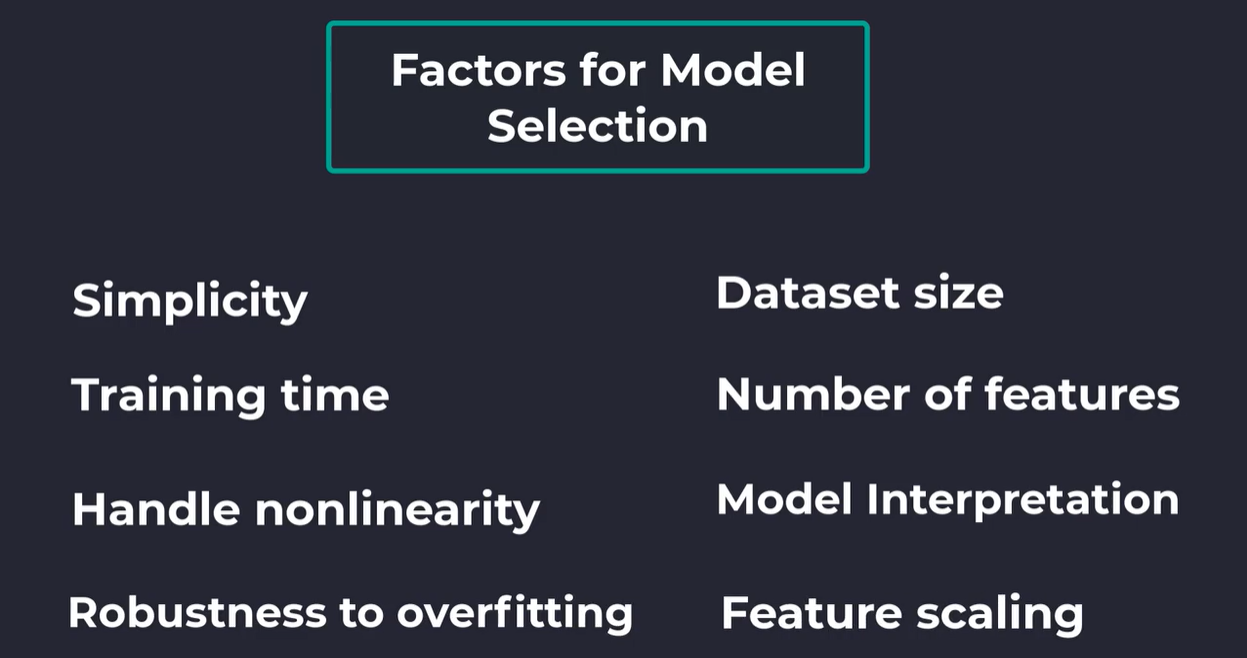

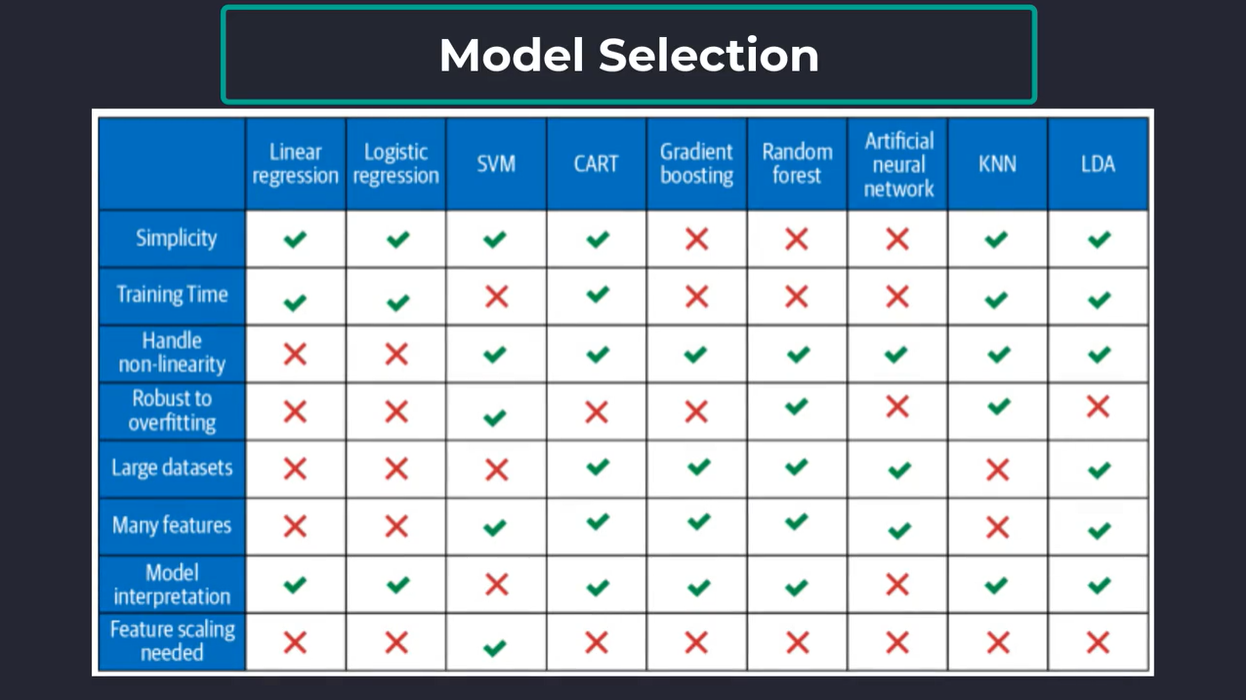

# Overfitting / Underfitting

Related to Bias and Variance tradeoff
Bias leads to underfitting of the model
High variance leads to overfitting of the model

## Methods to counteract
1. More data
2. Regularisation
* Add a penalty factor to our loss function
* Help avoid too much weighting on partiular features
3. Cross validation
* Splits can be used to train, while remainder used to test
* eg. kFold cross validation

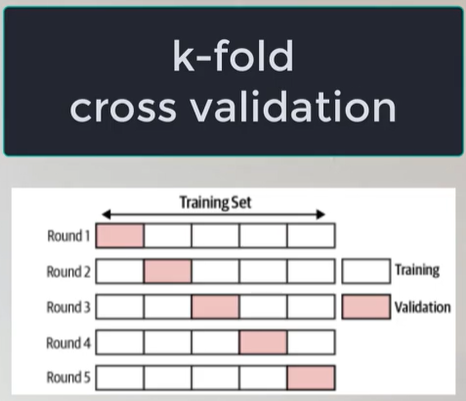
4. Evaluation Metrics
* will influence choice of model

* Regression
    * Mean absolute error (MAE)
    * Mean squared error (MSE)
    * Root Mean squared error (RMSE) - provides normalised units
    * R squared ($R^2$) - goodness of fit
    * Adjusted R squared (Adj-$R^2$) - considers the number of terms

* Classification
    - Defining Terms
        * True Positives (TP)
        * False Positives (FP)
        * True Negatives (TN)
        * False Negatives (FN)
    * $Accuracy = \frac{{\text{True positive} + \text{True negative}}}{{\text{Total}}}$
    * $Precision = \frac{{\text{True positive}}}{{\text{Actual results}}} = \frac{{\text{True positive}}}{{\text{True positive} + \text{False positive}}}$
    * $Sensitivity \, or \, Recall = \frac{{\text{True positive}}}{\text{Predictive results}} = \frac{{\text{True positive}}}{{\text{True positive} + \text{False negative}}}$
    * Area under ROC curve (AUC)
        * ROC = Receiver Operating Characteristic

    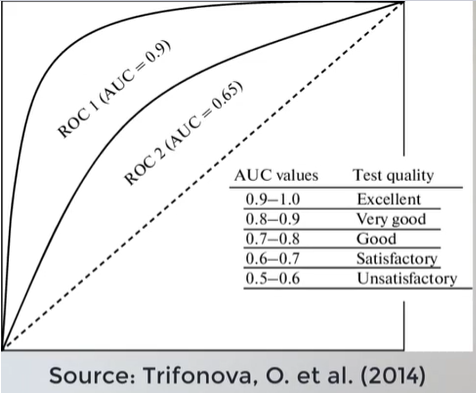

    * Confusion matrix
    
    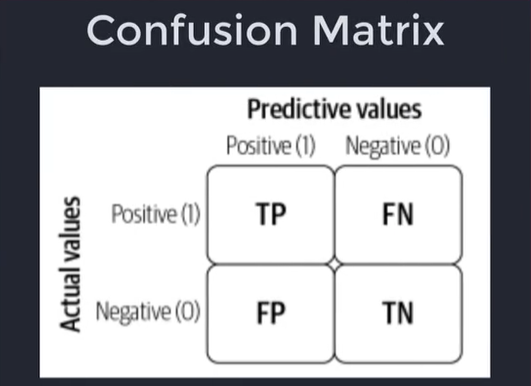
